# Project 5 -- Simrith Ranjan

**TA Help:** One TA helped me at 12:00 Friday, Chaewon Oh, in figuring out why myDF was not being found...we added extra cores. Additionally, she helped me understand how the plot function worked, and how to save tapply things

## Question 1

In [1]:
options(jupyter.rich_display = F)

In [2]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=200)

In [3]:
myDF <- read.csv("/anvil/projects/tdm/data/election/escaped2020sample.txt", sep="|")

In [5]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [6]:
library(lubridate, warn.conflicts = FALSE)

In [7]:
class(myDF$TRANSACTION_DT)

[1] "integer"

In [10]:
myDF$newdates <-mdy(myDF$TRANSACTION_DT)

In [11]:
class(myDF$newdates)

[1] "Date"

In [12]:
head(myDF$newdates)

[1] "2019-07-11" "2020-03-04" "2019-12-18" "2019-08-30" "2019-03-21"
[6] "2019-07-11"

In [13]:
myDF$TRANSACTION_YR <- year(myDF$newdates)

In [14]:
head(myDF$TRANSACTION_YR)

[1] 2019 2020 2019 2019 2019 2019

In [21]:
transPerYear <- tapply(myDF$TRANSACTION_AMT, myDF$TRANSACTION_YR, sum)

In [16]:
table(myDF$TRANSACTION_YR)


   2002    2010    2015    2016    2017    2018    2019    2020 
      1       1       3       2       3     369 3160207 1518175 

In [22]:
transPerYear


     2002      2010      2015      2016      2017      2018      2019      2020 
      500       500       525      1250      2550    219497 581564250 485800503 

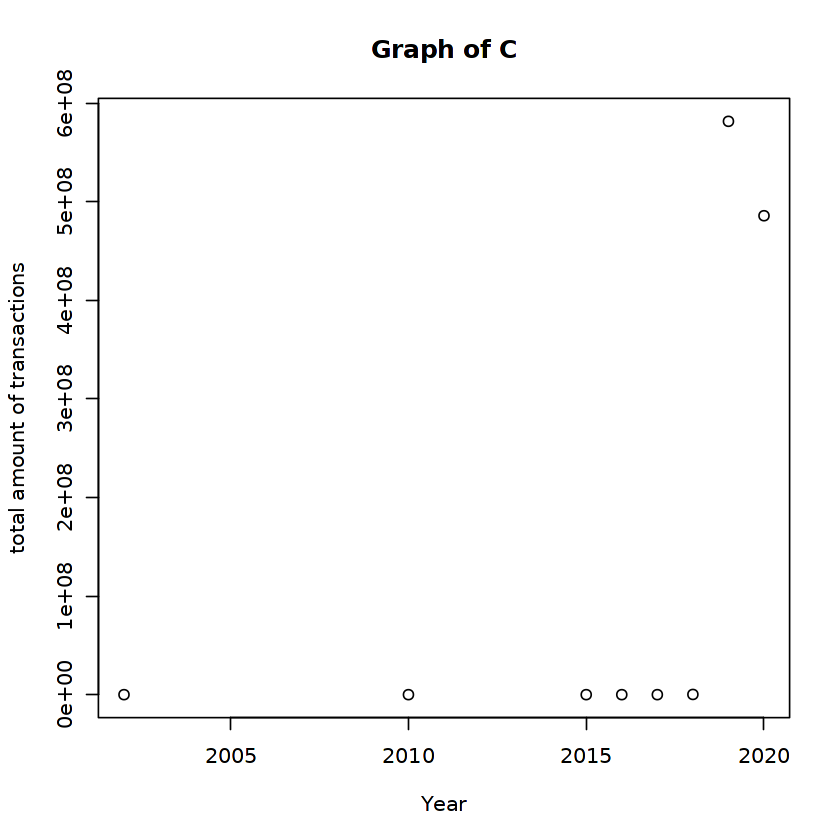

In [23]:
plot(row.names(transPerYear), transPerYear, xlab="Year", ylab="total amount of transactions", main = "Graph of C")

## Question 2

In [25]:
my2020DF <-subset(myDF, TRANSACTION_YR == "2020")

In [26]:
dim(myDF)

[1] 4678762      23

In [27]:
dim(my2020DF)

[1] 1518175      23

In [28]:
my2020DF$TRANSACTION_MONTH <- month(my2020DF$newdates)

In [29]:
head(my2020DF)

   CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
2  C00401224 N         M4     P               2.020042e+17 24T           
9  C00523936 N         M5     P               2.020051e+17 15            
11 C00369033 N         12P    P2020           2.020022e+17 15E           
12 C00401224 N         M4     P               2.020042e+17 24T           
13 C00003418 N         M4     P               2.020042e+17 15            
14 C00696948 N         M2     P2020           2.020022e+17 15E           
   ENTITY_TP NAME                   CITY        STATE ZIP_CODE 
2  IND       MYERS, ELIZABETH       SCOTTSVILLE NY    14546    
9  IND       DICE, KEVIN            SOMERSET    NJ    088731111
11 IND       SMELLEY, KAY MS.       CYPRESS     TX    774293945
12 IND       WELLMAN, NANCY         RIVERDALE   NY    10471    
13 IND       WARD, KATHLEEN A. MRS. PALOS PARK  IL    604641414
14 IND       GIBLIN, KATHLEEN       SEATTLE     WA    981443225
   EMPLOYER             OCCUPATION

In [33]:
transPerMonth <- tapply(my2020DF$TRANSACTION_AMT, my2020DF$TRANSACTION_MONTH, sum)

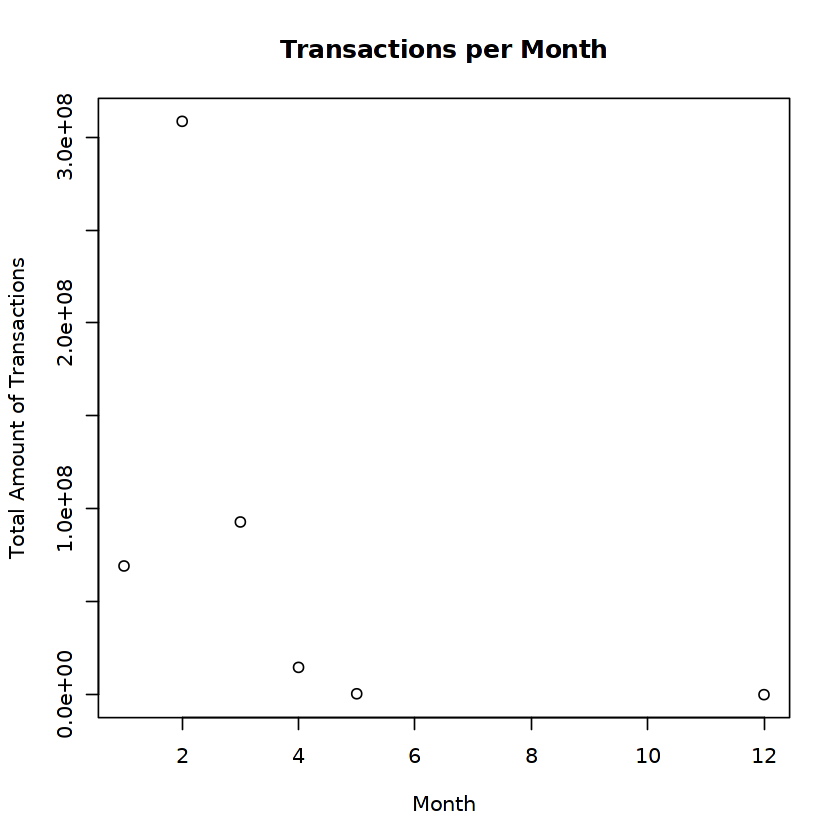

In [34]:
plot(row.names(transPerMonth), transPerMonth, xlab = "Month", ylab = "Total Amount of Transactions", main = "Transactions per Month")




## Question 3

In [38]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$NAME, sum)))

            REPUBLICAN GOVERNORS ASSOCIATION 
                                     3300000 
UNITED BROTHERHOOD OF CARPENTERS AND JOINERS 
                                     3936291 
                                  YASS, JEFF 
                                     6047000 
   EVERYTOWN FOR GUN SAFETY ACTION FUND, INC 
                                    10005656 
                                 STEYER, TOM 
                                    24796081 
                       BLOOMBERG, MICHAEL R. 
                                   275751211 

In [37]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [42]:
transPerState <- tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)))

In [43]:
transPerZip <- tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)), n=10)

A. Michael Bloomberg gave the most money altogether
B. The five states which the most money was given from are DC, FL, TX, CA, NY (technically DC isn't a state so MA would replace DC... but I maybe overthinking this question)
C. The ten zip codes are : 200361806, 101543302 ,78209  ,   20006 , 200012133 , 190041188 , 101634184 , 941040626 , 101501101 , 101501060 

## Question 4

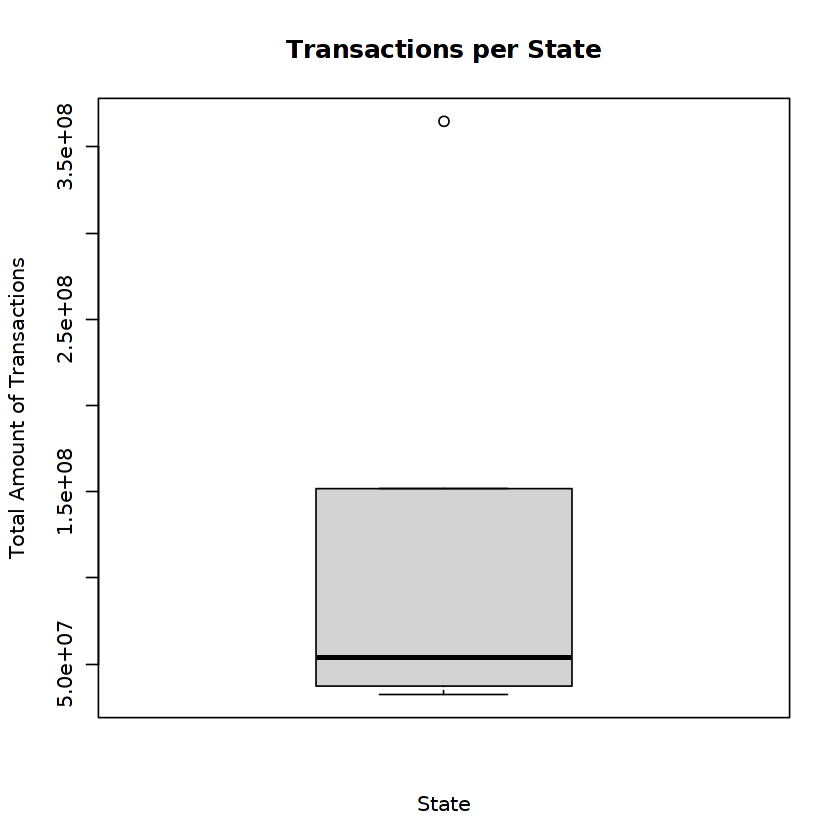

In [46]:
boxplot(transPerState, xlab = "State", ylab = "Total Amount of Transactions", main = "Transactions per State")




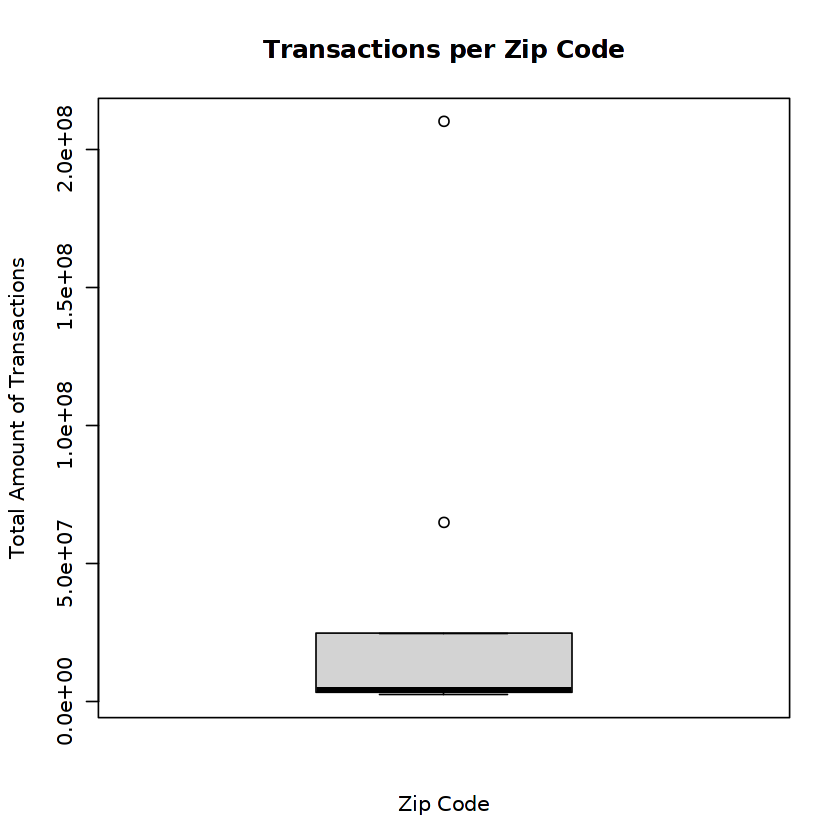

In [47]:
boxplot(transPerZip, xlab = "Zip Code", ylab = "Total Amount of Transactions", main = "Transactions per Zip Code")




## Question 5

In [48]:
transPerOCCUPATION <- tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$OCCUPATION , sum)))

In [50]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$OCCUPATION , sum)))

         CEO     ATTORNEY              NOT EMPLOYED      RETIRED      FOUNDER 
    25055647     31326953     77364020     84855951     98774206    279442327 

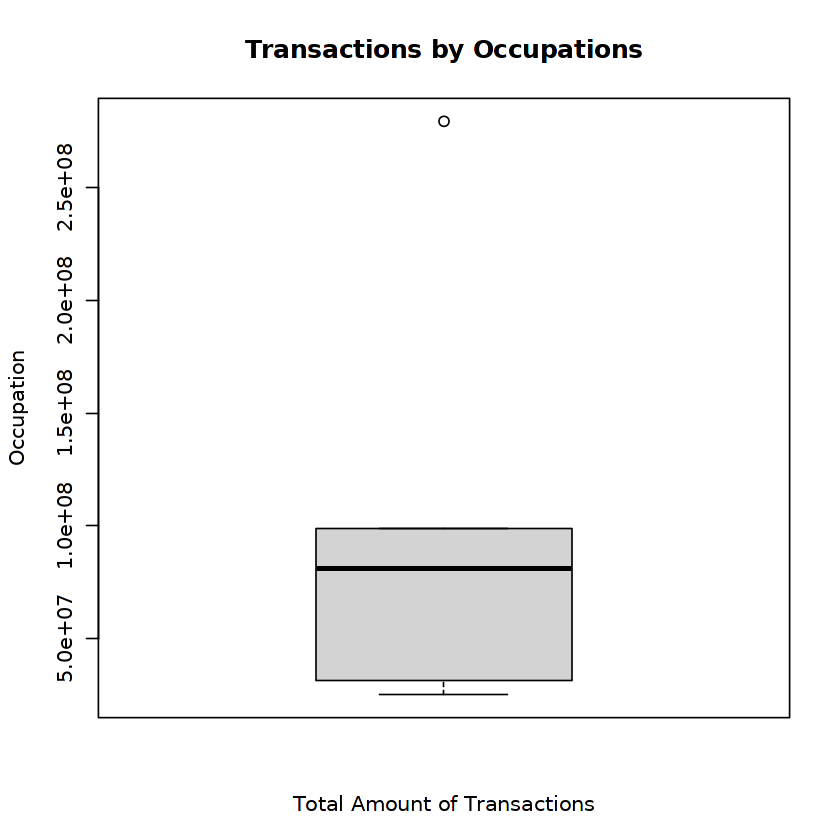

In [49]:
boxplot(transPerOCCUPATION, xlab = "Total Amount of Transactions", ylab = "Occupation", main = "Transactions by Occupations")

What I found most interesting is a huge number of the occupations are not employeed (only occupations above are retired and founder). Additionally, the fourth highest is blank...My first question is why are unemployed people donating to campaigns? Or, is this a cover-up job for another type of job? Nonetheless, as displayed by the boxplot, Founders donate the most amount of times among all other occupations. This makes sense as they probably found a lot of success with some government help, and would like to lobby to get more success in the next election.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.